# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


# Load your time series data

In [3]:
# Sample synthetic data (replace with your actual time series)
np.random.seed(42)
data = np.random.randn(100) + np.sin(np.linspace(0, 10, 100))
df = pd.DataFrame(data, columns=['Value'])


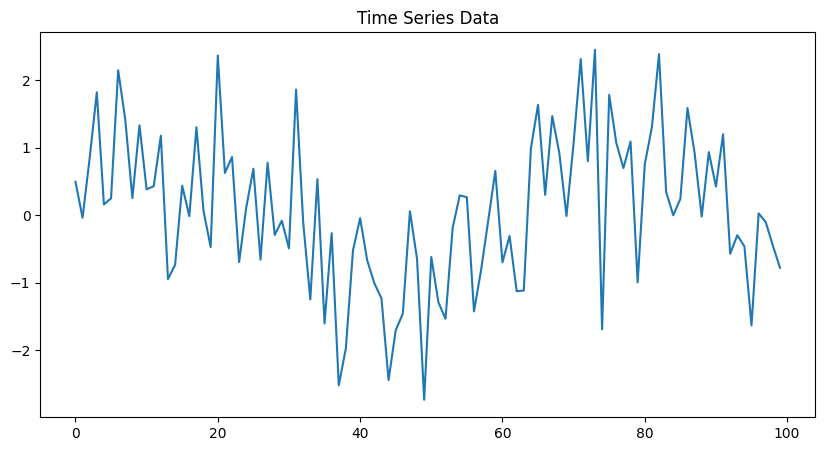

In [4]:
# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(df['Value'])
plt.title('Time Series Data')
plt.show()


# Analyze ACF and PACF plots

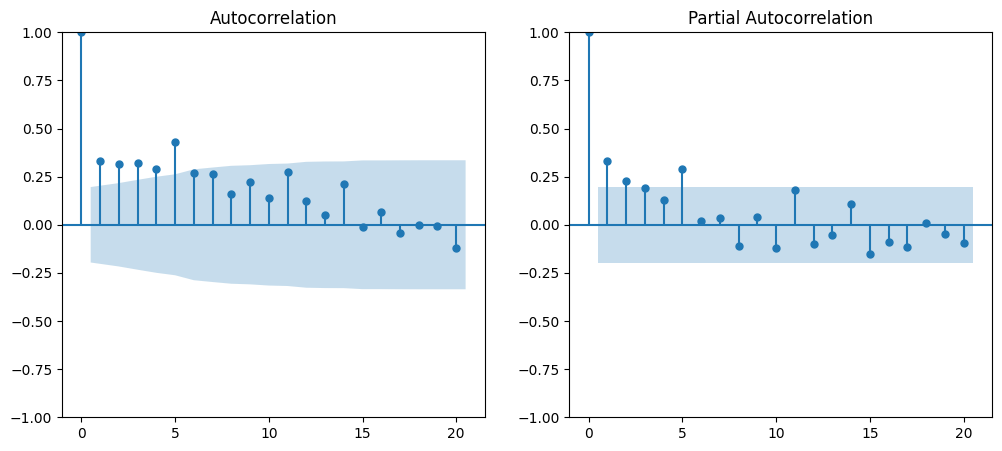

In [5]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_acf(df['Value'], ax=axes[0])
plot_pacf(df['Value'], ax=axes[1])
plt.show()


# Select p and q based on ACF/PACF
- Identify where ACF cuts off → Suggests q
- Identify where PACF cuts off → Suggests p




# Fit an ARMA Model

In [8]:
p = 5  # Replace with PACF cutoff lag
q = 5  # Replace with ACF cutoff lag

# Fit ARMA model (ARIMA without differencing)
model = ARIMA(df['Value'], order=(p, 0, q))
result = model.fit()

# Summary
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -134.532
Date:                Fri, 02 May 2025   AIC                            293.064
Time:                        18:11:34   BIC                            324.326
Sample:                             0   HQIC                           305.716
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0740      0.403      0.184      0.854      -0.716       0.864
ar.L1          0.0678      0.250      0.271      0.787      -0.423       0.559
ar.L2          0.7554      0.150      5.044      0.0

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Check residuals (Model Validation)

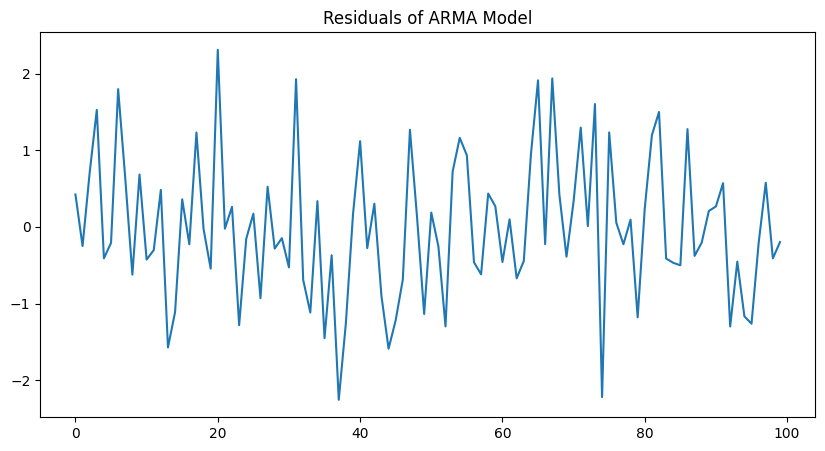

In [9]:
plt.figure(figsize=(10,5))
plt.plot(result.resid)
plt.title('Residuals of ARMA Model')
plt.show()
